### CLUSTERING ALGORITHM

#### PROBELM

Use sklearn.datasets iris flower dataset to train your model using logistic regression. You need to figure out the accuracy of your model and use that to predict different samples in your test dataset. In iris dataset there are 150 samples containing following features,

- Sepal Length
- Sepal Width
- Petal length
- Petal width


Using above 4 features you will classify a flower  in one of the three categories,
- Setosa
- Versicolour
- Virginica

In [228]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [229]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [230]:
# Load the Iris dataset
iris_data = load_iris()

In [231]:
iris_data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [232]:
#target attribute which will give target variable, and already imported in numeric value from categorical data.
iris_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [233]:
# Create a DataFrame
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

# Add the target variable 'species' to the DataFrame
df['class'] = iris_data.target

# Display the DataFrame
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Data Exploration

In [234]:
df.shape

(150, 5)

In [235]:
# To get info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [236]:
#To display the initial rows
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [237]:
#To display the final rows of the DataFrame
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [238]:
#To display column labels of DataFrame
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

In [239]:
#To display the statistical analysis for numerical columns within the DataFrame
print("\nStatistical analysis on numerical features:")
df.describe()


Statistical analysis on numerical features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


##### There exist outliers in the petal length column

In [240]:
#Checking is there any null value
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
class                0
dtype: int64

#### Data Preprocessing

In [241]:
# Dropping Duplicates
df=df.drop_duplicates()
df=df.reset_index(drop=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [242]:
df['class'].unique()

array([0, 1, 2])

In [243]:
df.groupby('class').size()

class
0    50
1    50
2    49
dtype: int64

### Visualization

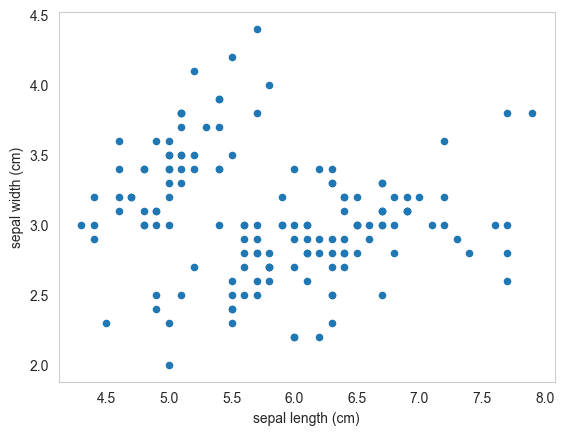

In [244]:
df.plot(kind="scatter", x= "sepal length (cm)", y ="sepal width (cm)")
plt.grid()
plt.show()

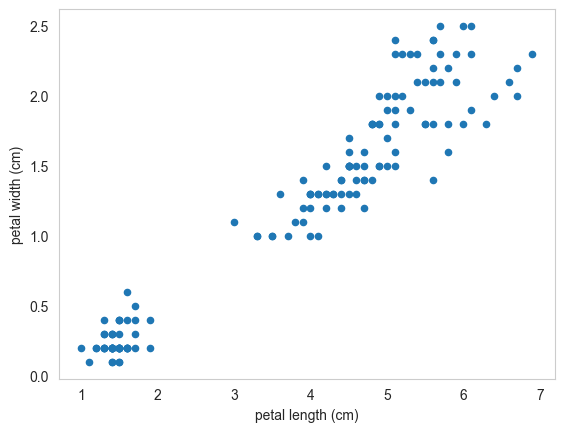

In [245]:
df.plot(kind="scatter", x= "petal length (cm)", y ="petal width (cm)")
plt.grid()
plt.show()

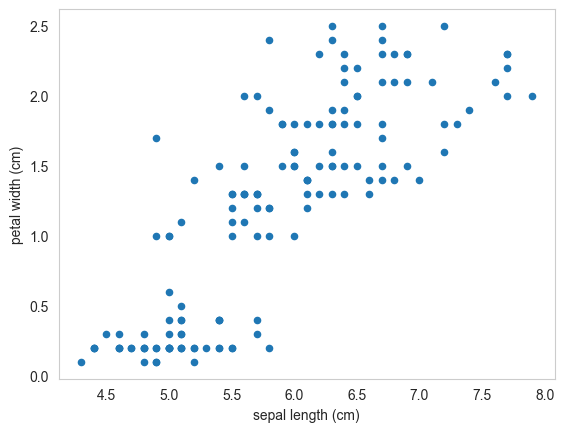

In [246]:
df.plot(kind="scatter", x= "sepal length (cm)", y ="petal width (cm)")
plt.grid()
plt.show()

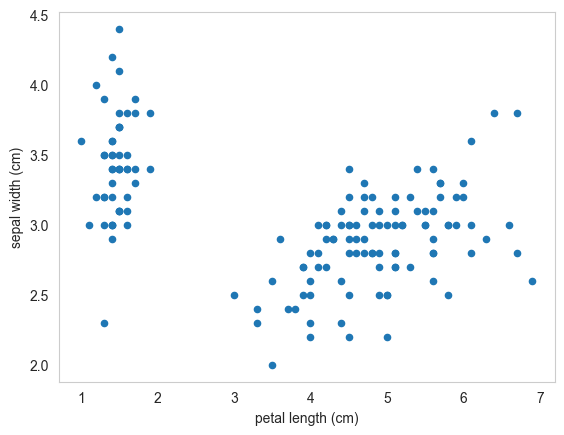

In [247]:
df.plot(kind="scatter", x= "petal length (cm)", y ="sepal width (cm)")
plt.grid()
plt.show()

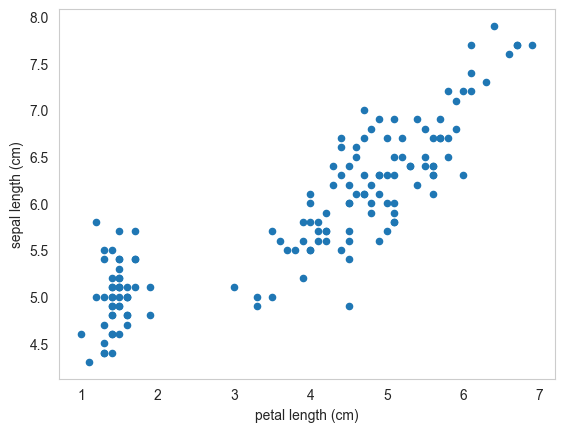

In [248]:
df.plot(kind="scatter", x= "petal length (cm)", y ="sepal length (cm)")
plt.grid()
plt.show()

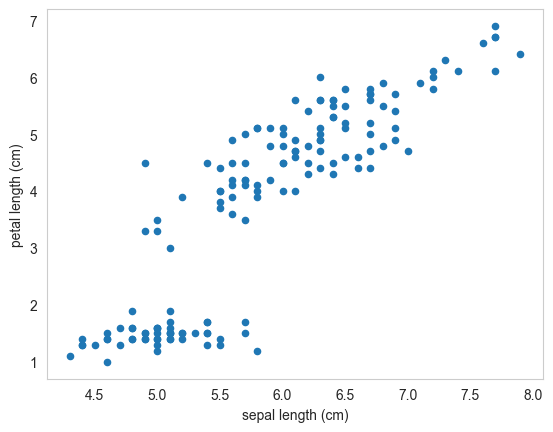

In [249]:
df.plot(kind="scatter", x= "sepal length (cm)", y ="petal length (cm)")
plt.grid()
plt.show()

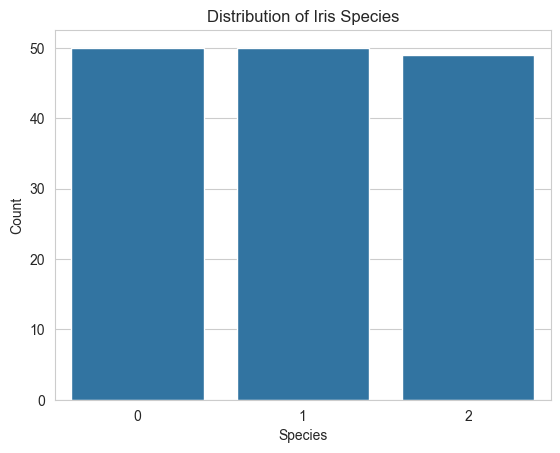

In [250]:
# Create a count plot for the target column 'class'
sns.countplot(x='class', data=df)
plt.title('Distribution of Iris Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [251]:
colname= df.select_dtypes("float64").columns
colname

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

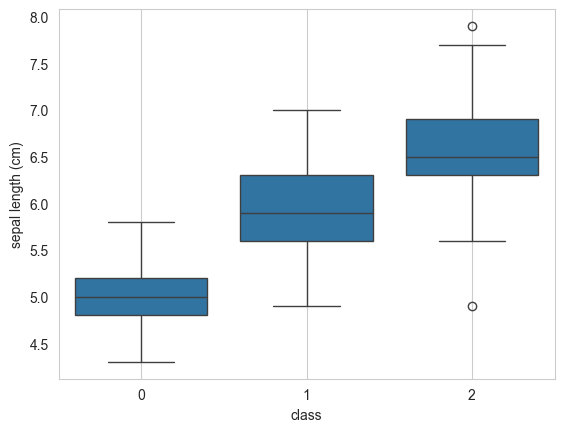

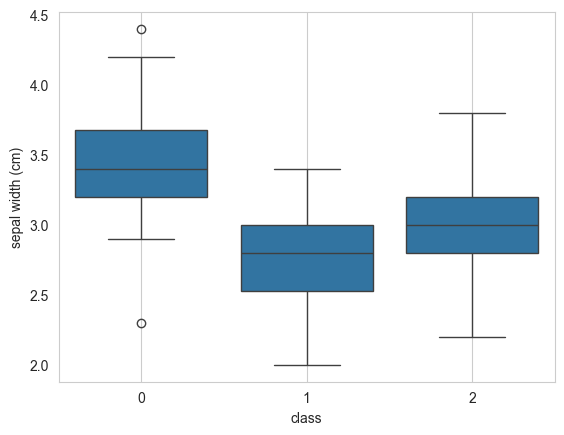

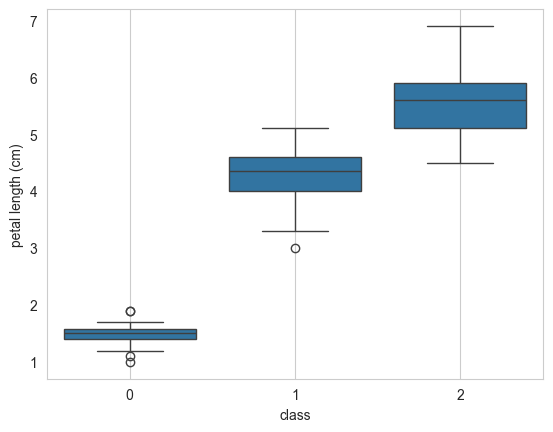

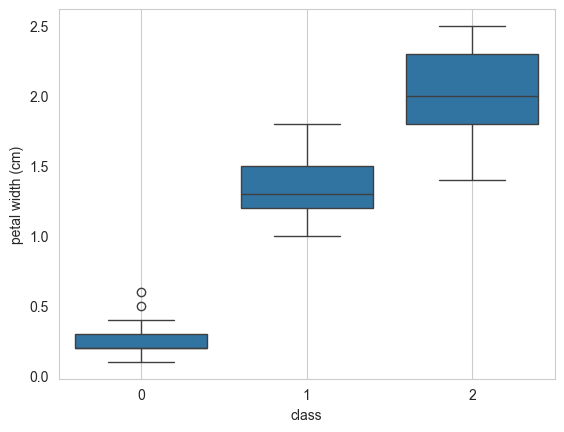

In [252]:
for col in df[colname]:
    plt.figure()
    sns.boxplot(data=df, x="class", y=df[col])
    plt.grid()
    plt.show()

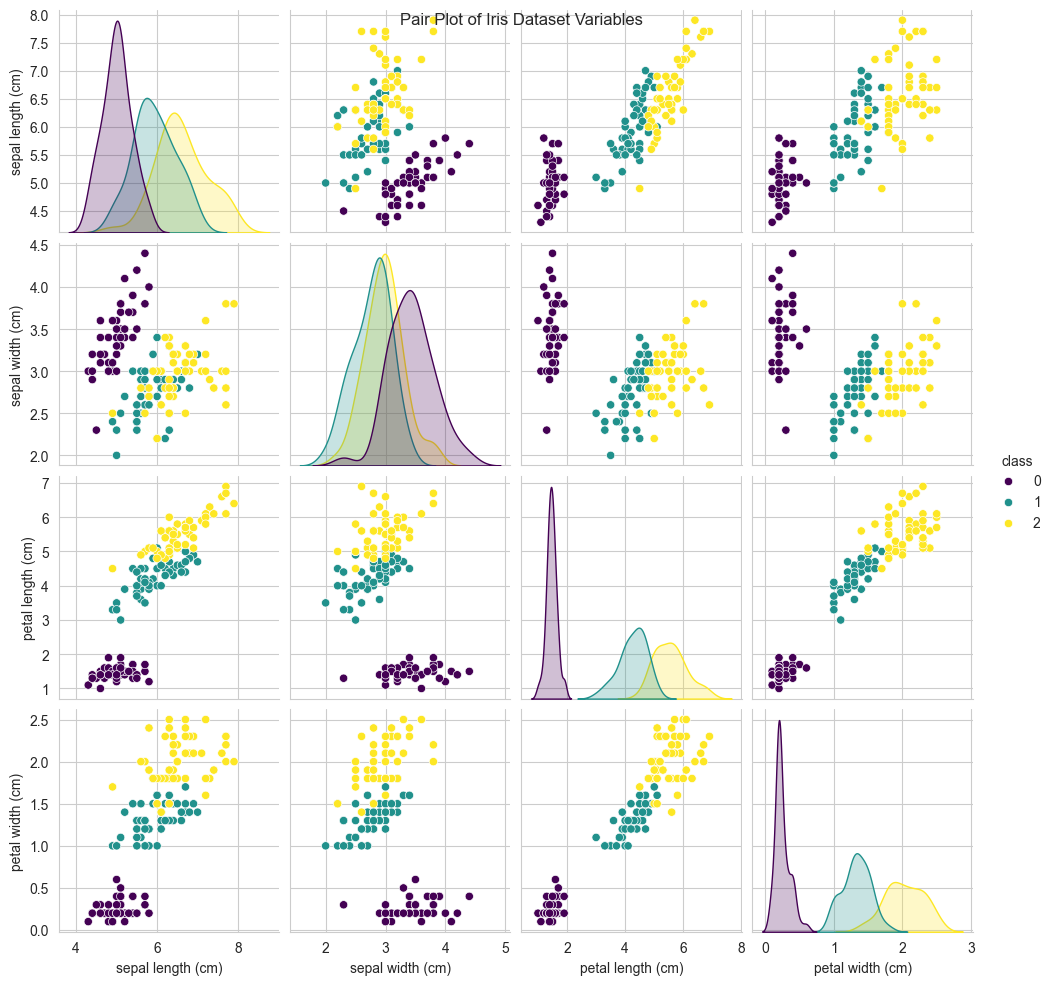

In [253]:
#create a pair plot
sns.pairplot(df,hue='class',palette='viridis')
sns.set_style("whitegrid")
plt.suptitle("Pair Plot of Iris Dataset Variables")
plt.show()

This provides a visual overview of the relationships between different pairs of variables (features) in the Iris dataset. Each scatterplot shows the relationship between two variables, and the color of the data points indicates the species of the iris flower.

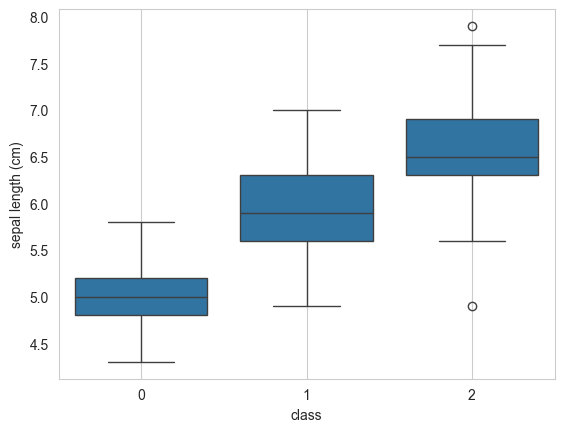

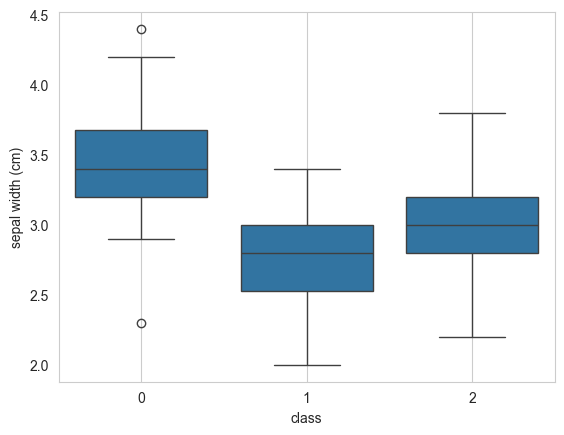

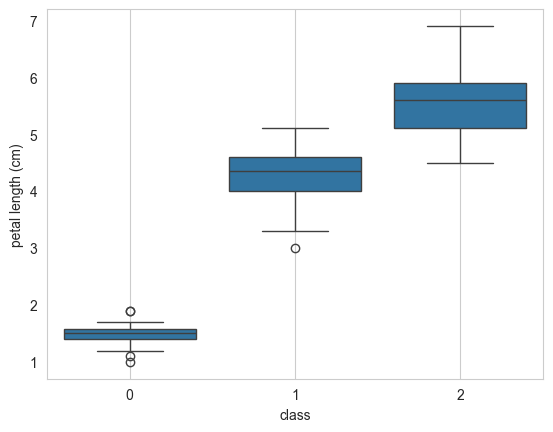

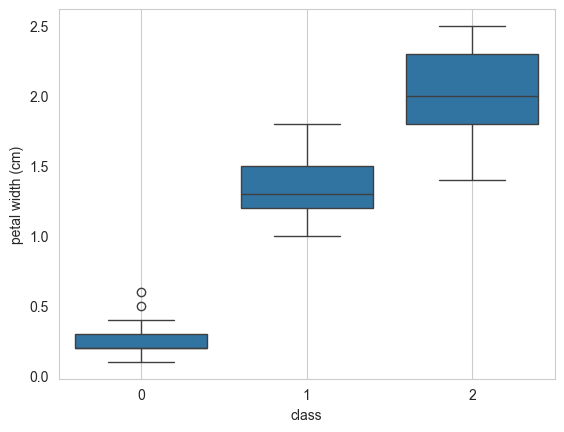

In [254]:
for col in df[colname]:
    plt.figure()
    sns.boxplot(data=df, x="class", y=df[col])
    plt.grid()
    plt.show()

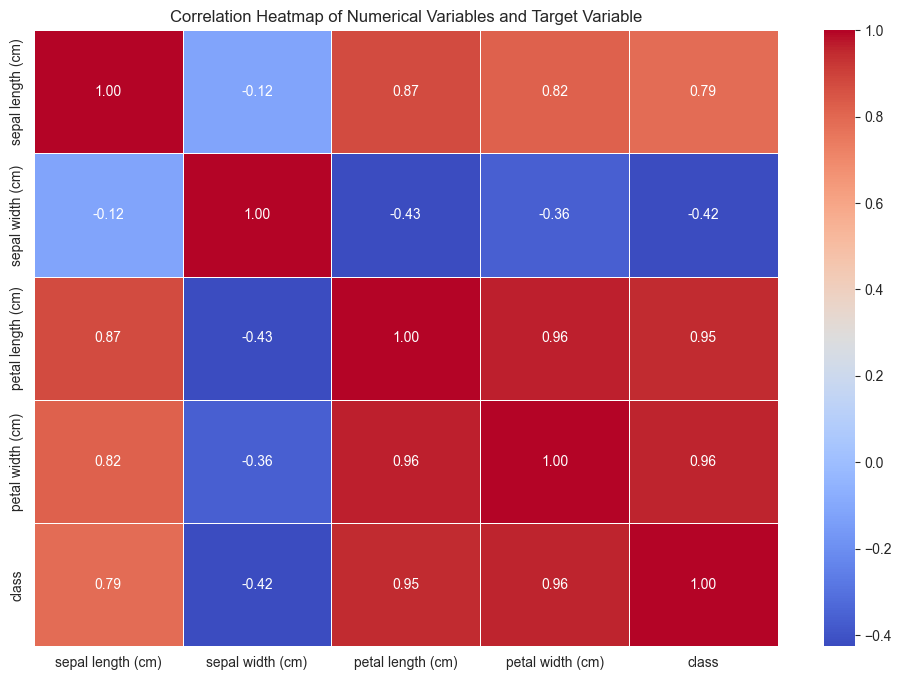

In [255]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Variables and Target Variable')
plt.show()

### Outlier Treatment

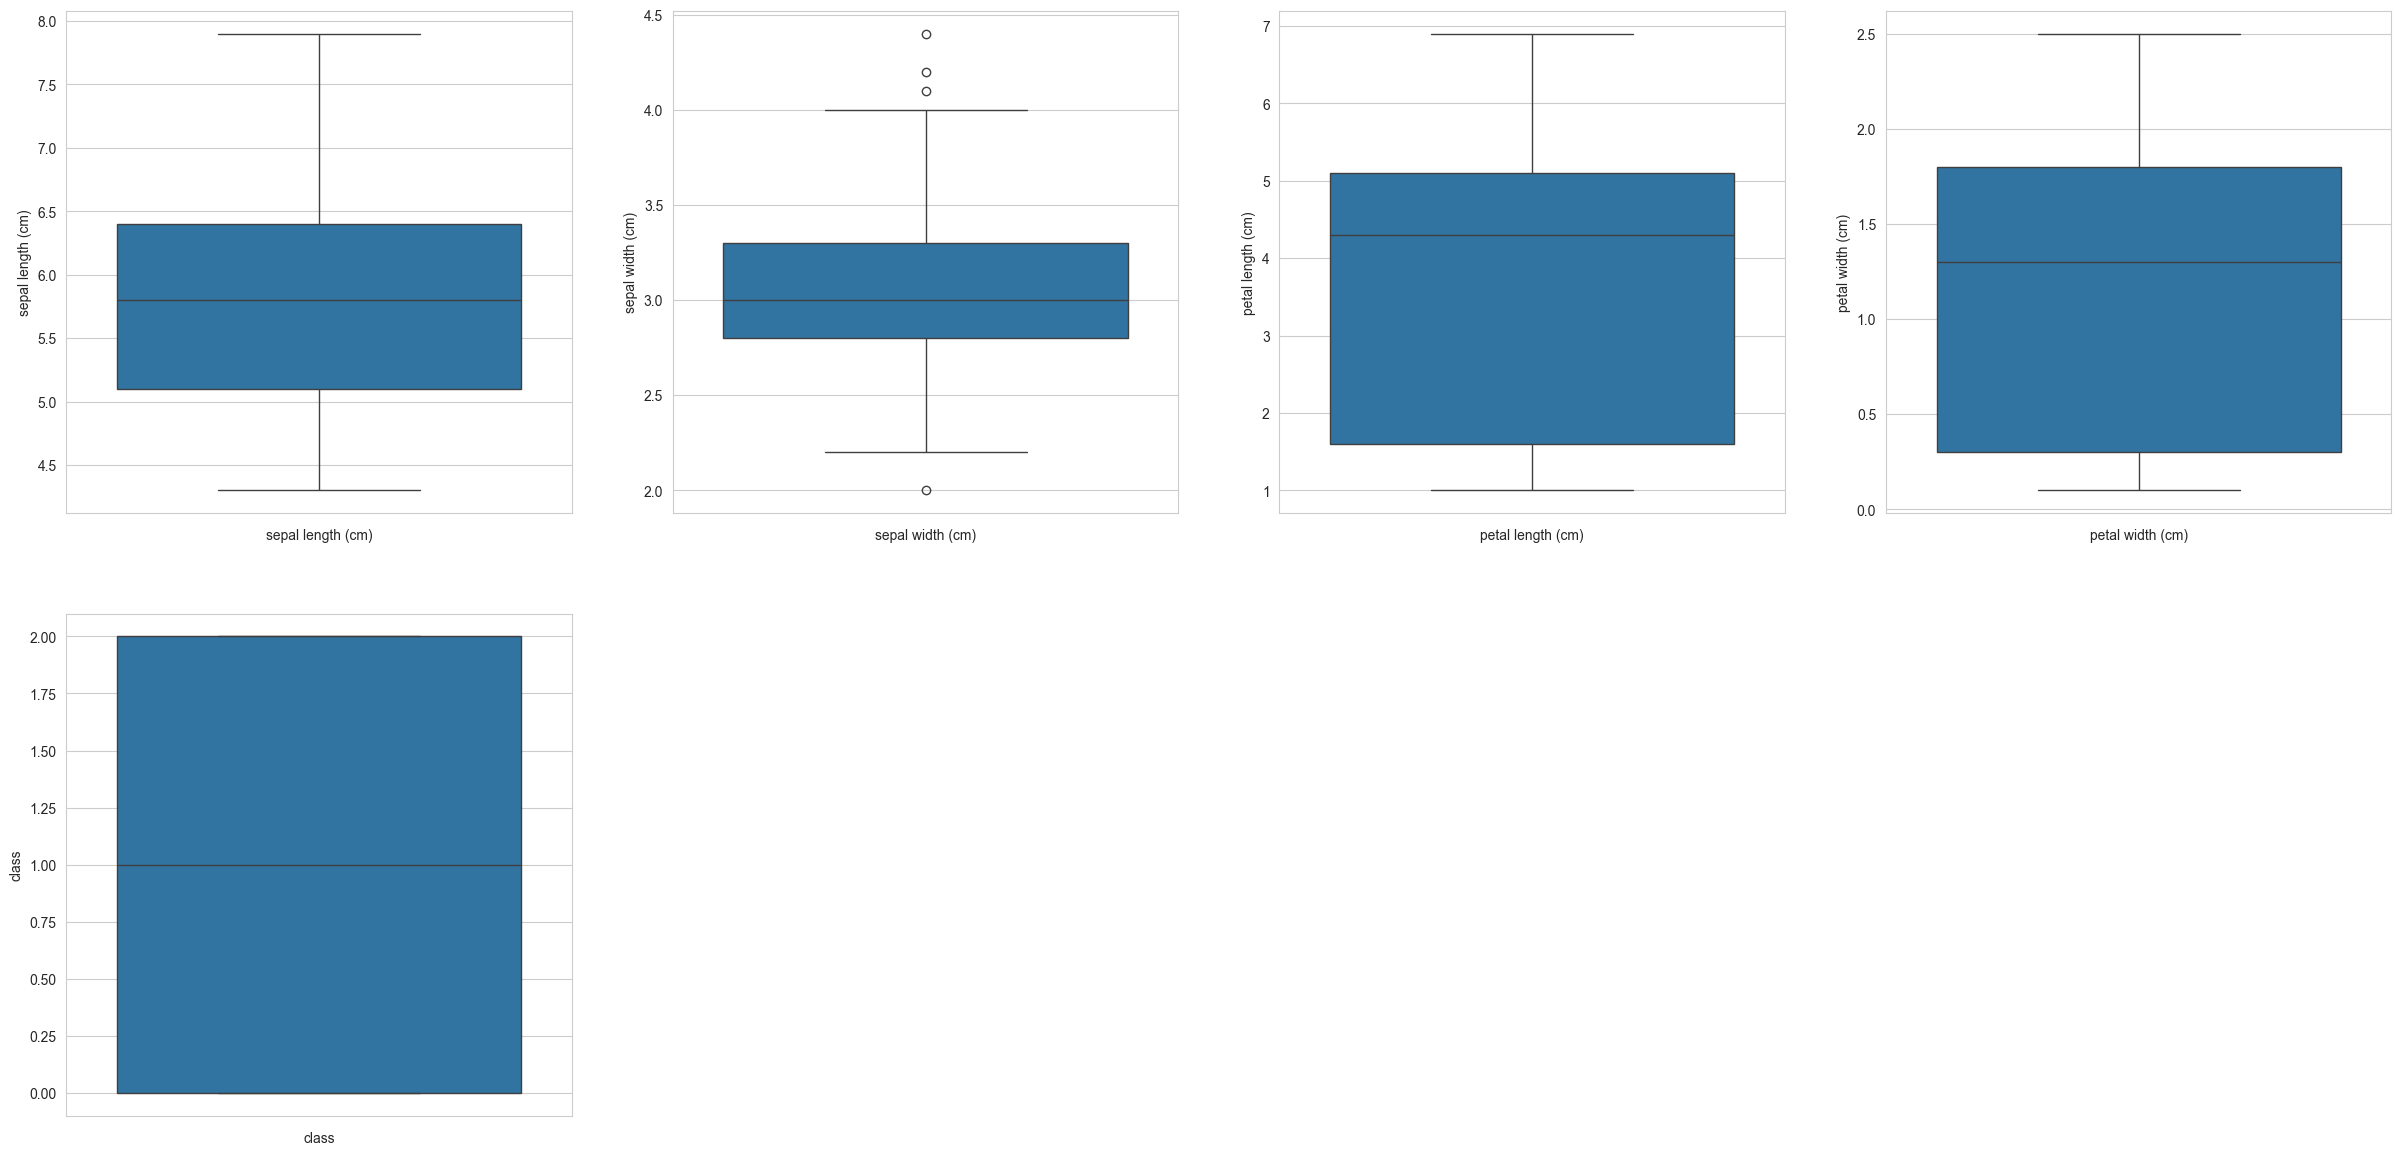

In [256]:
#box plot to identify outliers
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [257]:
def whisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw=q3+1.5*iqr
    return lw,uw

In [258]:
#removing outliers using capping
for i in df.select_dtypes(include="number").columns:
    lw,uw=whisker(df[i])
    df[i]=np.where(df[i]<lw,lw,df[i])
    df[i]=np.where(df[i]>uw,uw,df[i]) 

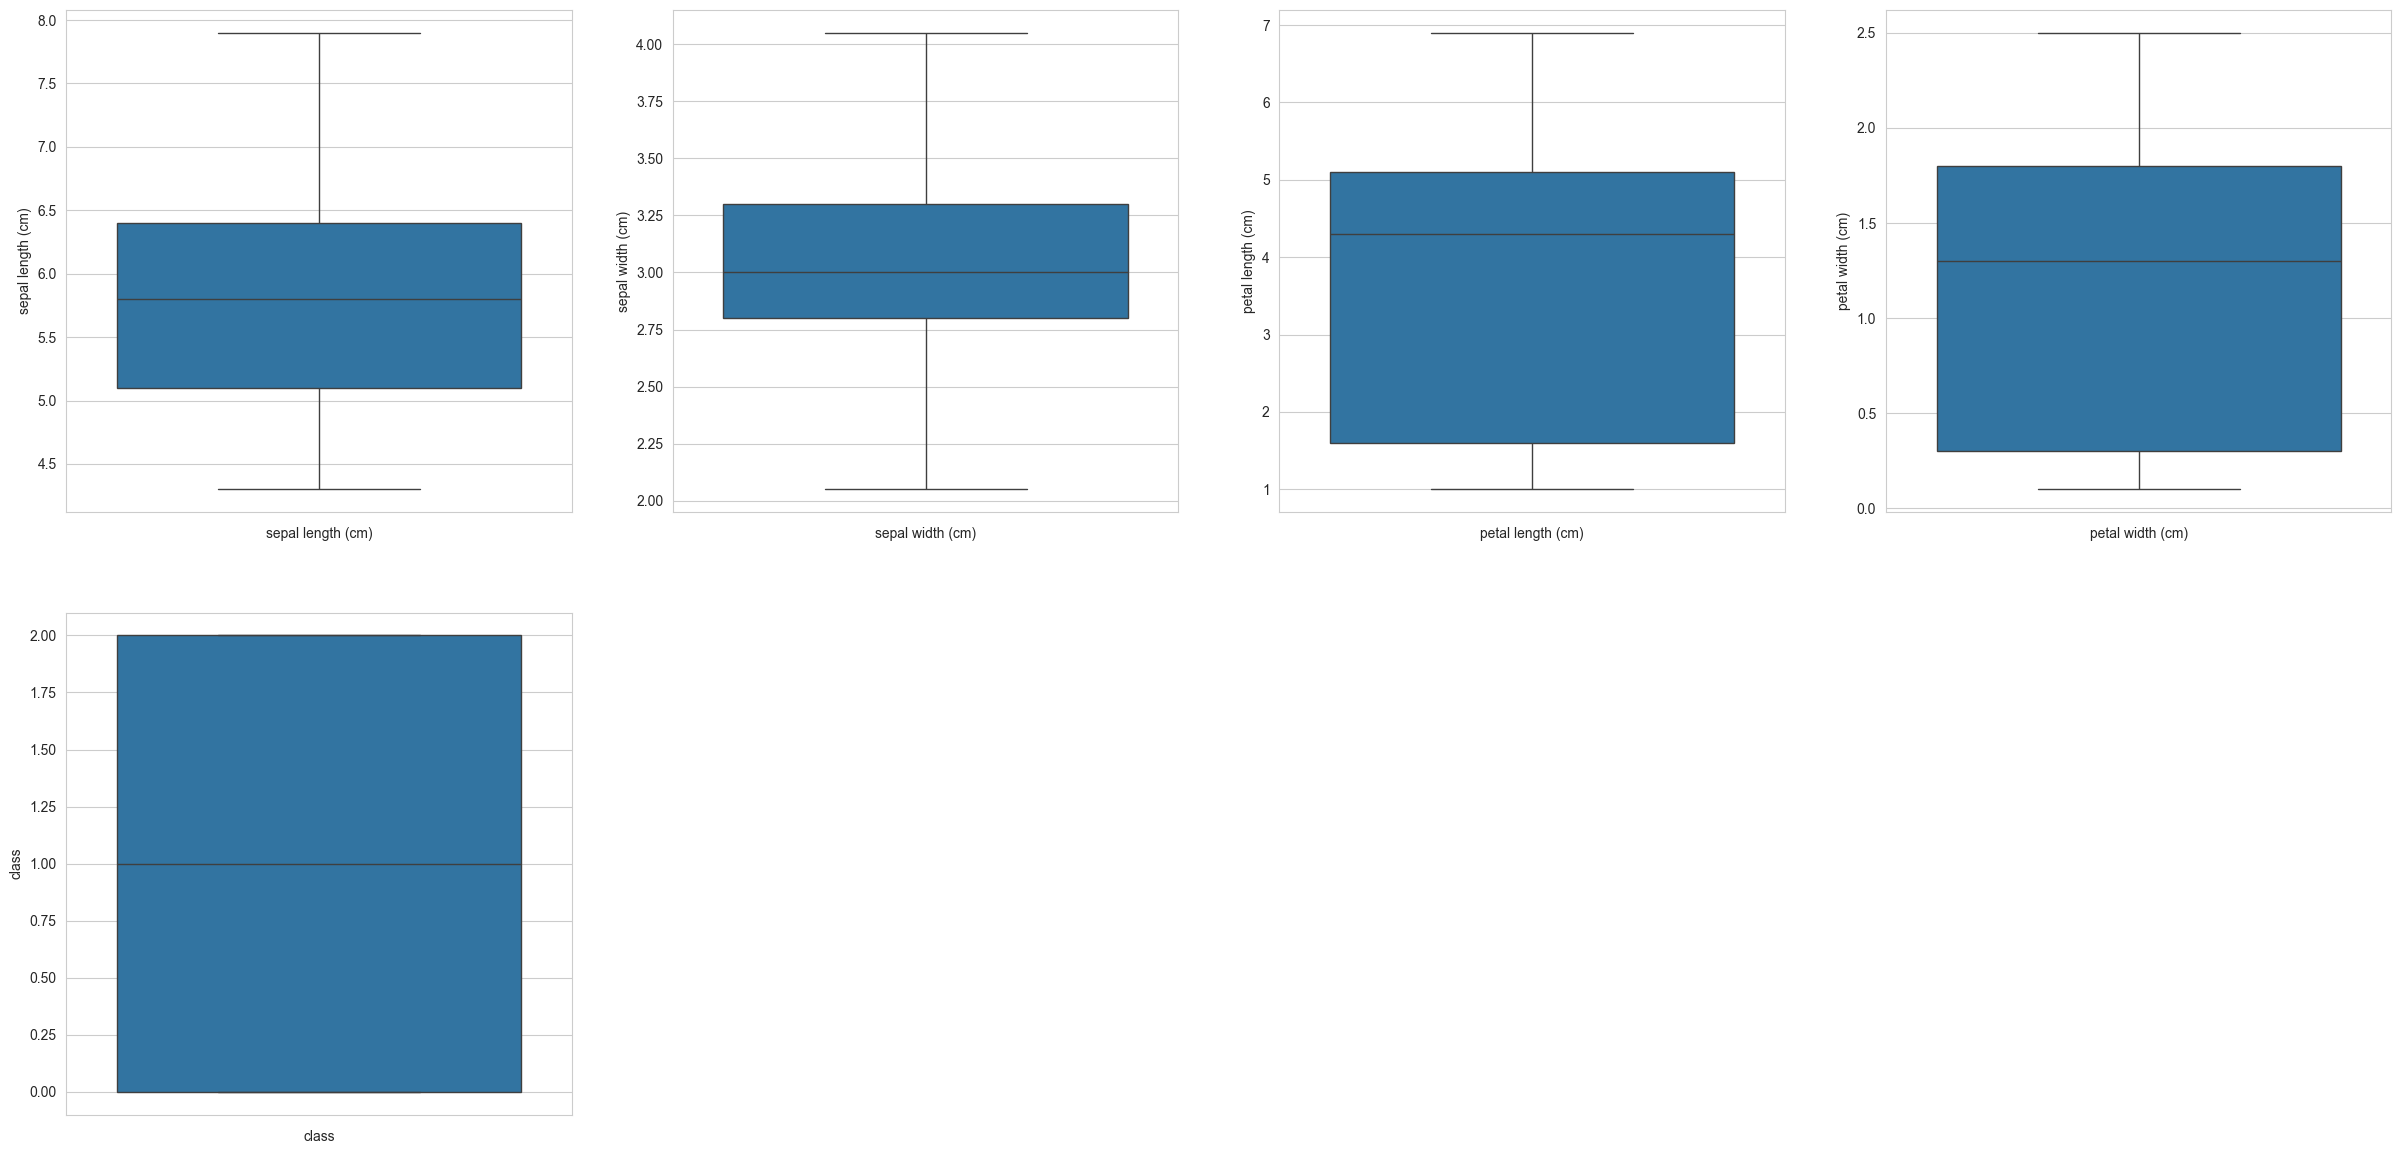

In [259]:
#box plot after outlier treatment
fig = plt.figure(figsize=(30,30))
counter = 0

for col in df.select_dtypes(include="number").columns:
    fig.add_subplot(4,4,counter+1)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    counter = counter + 1

In [260]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2.0
145,6.3,2.5,5.0,1.9,2.0
146,6.5,3.0,5.2,2.0,2.0
147,6.2,3.4,5.4,2.3,2.0


As we have no categorical columns, we can skip encoding process

#### Feature Scaling

In [261]:
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[colname])

# Convert scaled data to DataFrame
scaled_df = pd.DataFrame(df_scaled, columns=colname)

df[colname] = scaled_df

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,0.222222,0.725,0.067797,0.041667,0.0
1,0.166667,0.475,0.067797,0.041667,0.0
2,0.111111,0.575,0.050847,0.041667,0.0
3,0.083333,0.525,0.084746,0.041667,0.0
4,0.194444,0.775,0.067797,0.041667,0.0
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2.0
145,0.555556,0.225,0.677966,0.750000,2.0
146,0.611111,0.475,0.711864,0.791667,2.0
147,0.527778,0.675,0.745763,0.916667,2.0


### Model Building

In [262]:
final_df=df.drop('class',axis=1)

In [263]:
final_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.725,0.067797,0.041667
1,0.166667,0.475,0.067797,0.041667
2,0.111111,0.575,0.050847,0.041667
3,0.083333,0.525,0.084746,0.041667
4,0.194444,0.775,0.067797,0.041667
...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667
145,0.555556,0.225,0.677966,0.750000
146,0.611111,0.475,0.711864,0.791667
147,0.527778,0.675,0.745763,0.916667


### 1. K Means Clustering

In [264]:
from sklearn.cluster import KMeans

In [265]:
km=KMeans(n_clusters=3)
km.fit(x)

KMeans(n_clusters=3)

In [266]:
y_pred=km.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [267]:
final_df['cluster']=y_pred
final_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.725,0.067797,0.041667,0
1,0.166667,0.475,0.067797,0.041667,0
2,0.111111,0.575,0.050847,0.041667,0
3,0.083333,0.525,0.084746,0.041667,0
4,0.194444,0.775,0.067797,0.041667,0
...,...,...,...,...,...
144,0.666667,0.475,0.711864,0.916667,2
145,0.555556,0.225,0.677966,0.750000,1
146,0.611111,0.475,0.711864,0.791667,2
147,0.527778,0.675,0.745763,0.916667,2


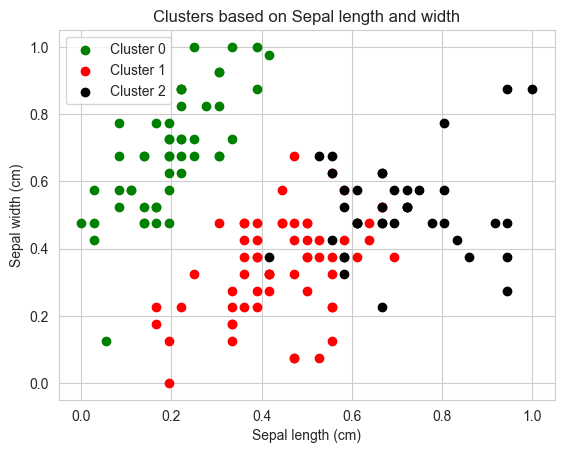

In [268]:
# Assuming 'cluster' is the column name containing cluster labels
df1 = final_df[final_df['cluster'] == 0]
df2 = final_df[final_df['cluster'] == 1]
df3 = final_df[final_df['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Clusters based on Sepal length and width')
plt.legend()
plt.show()

In [269]:
#find out the centroids in each cluster
km.cluster_centers_

array([[0.19611111, 0.6835    , 0.07830508, 0.06083333],
       [0.44166667, 0.34458333, 0.57372881, 0.54583333],
       [0.70726496, 0.51602564, 0.79704476, 0.82478632]])

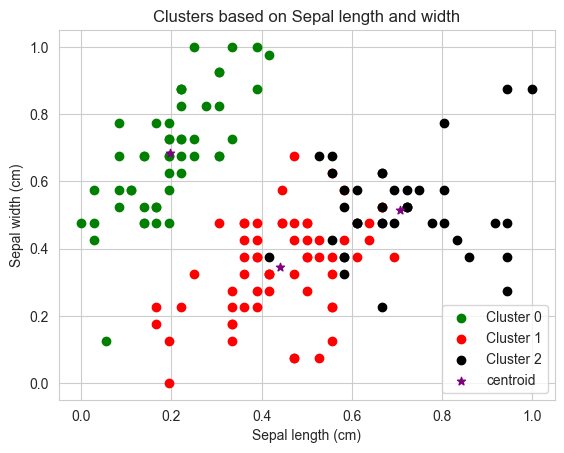

In [270]:
#scatter plot with centroids
df1 = final_df[final_df['cluster'] == 0]
df2 = final_df[final_df['cluster'] == 1]
df3 = final_df[final_df['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('Clusters based on Sepal length and width')
plt.legend()
plt.show()

#### Elbow Plot
If there are many clusters, then it is difficult to find out the optimal value of K using the scatter plot.
In this case we can use elbow plot to find K.

In [271]:
wcss= []
k_rng=range(2,10)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(x)
    wcss.append(km.inertia_)

wcss

[13.238314120110418,
 7.873410408644134,
 6.265541770665255,
 5.6106758611723055,
 4.732805545836138,
 4.05944633012037,
 3.690003570260926,
 3.200048188081861]

WCSS represents the sum of squared distances between each point and the centroid of its assigned cluster. 'wcss' will contain the WCSS values for each k from 1 to 9.

Higher WCSS indicate the optimal K value, Here  wcss is high when k=2

Text(0.5, 1.0, 'Elbow Plot')

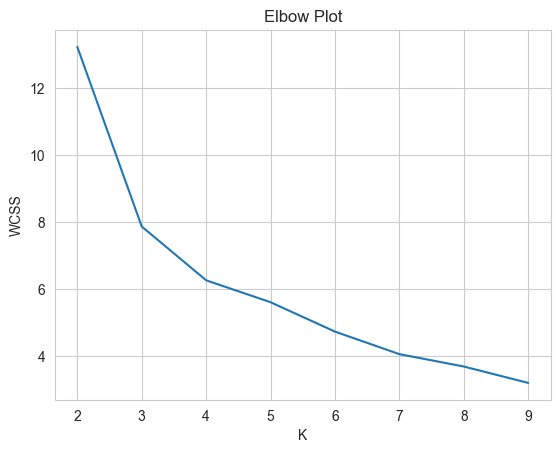

In [272]:
plt.xlabel('K')
plt.ylabel('WCSS')
plt.plot(k_rng,wcss)
plt.title('Elbow Plot')

Elbow plot shows the optimal k value k=2

#### Model Evaluation

#### Silhouette Analysis

We can use the silhouette score to evaluate the quality of clustering. The silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A higher silhouette score indicates better clustering.

In [273]:
from sklearn.metrics import silhouette_score
s= []
k_rng=range(2,11)
for k in k_rng:
    km=KMeans(n_clusters=k)
    km_pred=km.fit_predict(x)
    s.append(silhouette_score(x, km_pred))

s

[0.6206043243111915,
 0.48342719915490295,
 0.4359007350203918,
 0.35661444679747534,
 0.39123255652681066,
 0.40750376429033114,
 0.3524101791008928,
 0.319683052901895,
 0.3450732306677193]

These are the silhouette scores for different values of K

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

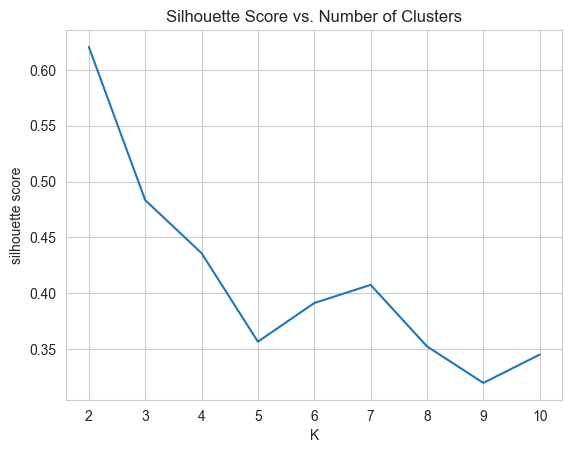

In [274]:
plt.xlabel('K')
plt.ylabel('silhouette score')
plt.plot(k_rng,s)
plt.title('Silhouette Score vs. Number of Clusters')

Highest Silhouette Score: Look for the value of k (number of clusters) that corresponds to the highest silhouette score on the plot. This value indicates the optimal number of clusters according to the silhouette score metric.

Overall Trend: Evaluate the overall trend of the silhouette scores as k increases. Typically, silhouette scores closer to 1 indicate better clustering, while scores closer to 0 or negative values suggest overlapping or poorly defined clusterd.

In [275]:
optimalkmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeansbest= optimalkmeans.fit_predict(x)

In [276]:
silhouette_score(x, y_kmeansbest)

0.6206043243111915

#### 2.Hierarchical Clustering

In [277]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

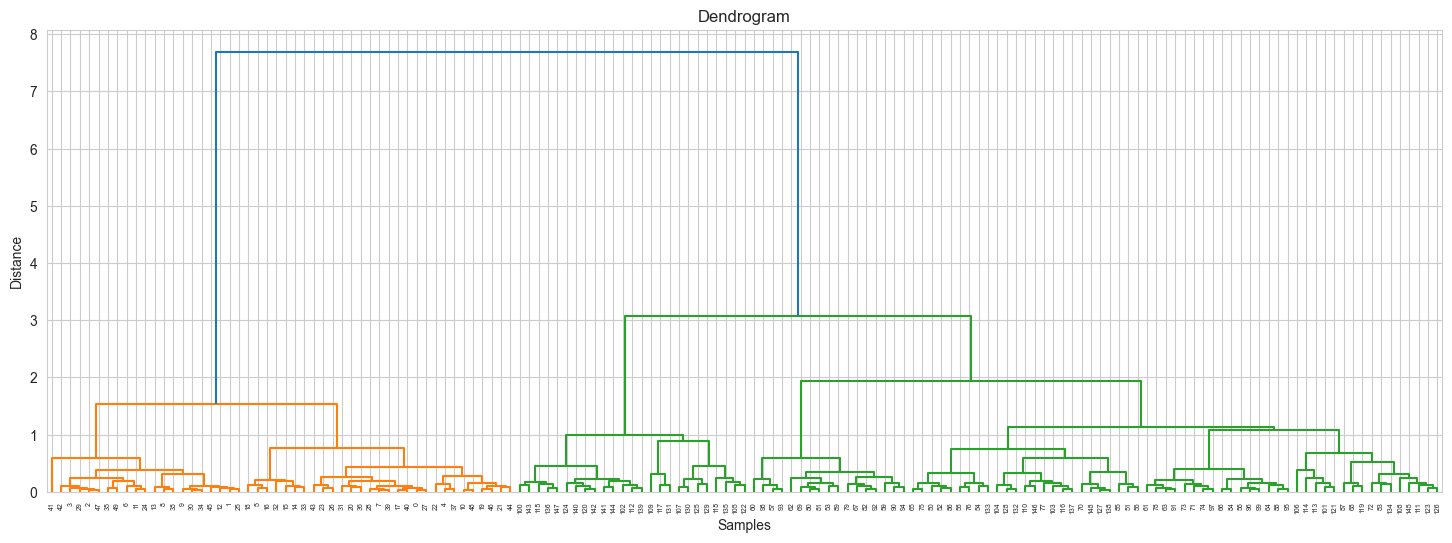

In [278]:
# Dendrogram plot
plt.figure(figsize=(18, 6))
# Calculate linkage using Ward's method and create the dendrogram
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

Determining the appropriate threshold for drawing the horizontal line in the dendrogram involves a delicate balancing act. It necessitates creating an adequate number of clusters to capture meaningful data patterns, while simultaneously avoiding an excessive amount that could lead to overfitting or diminish interpretability.

To establish the threshold, visually examine the dendrogram for notable jumps or gaps in the vertical lines. These disparities signal larger differences between clusters and can serve as natural breakpoints for delineating the dendrogram. This identified point can then serve as the threshold value for drawing the horizontal line.

The number of clusters is determined by counting the vertical lines intersected by the line drawn using the selected threshold.


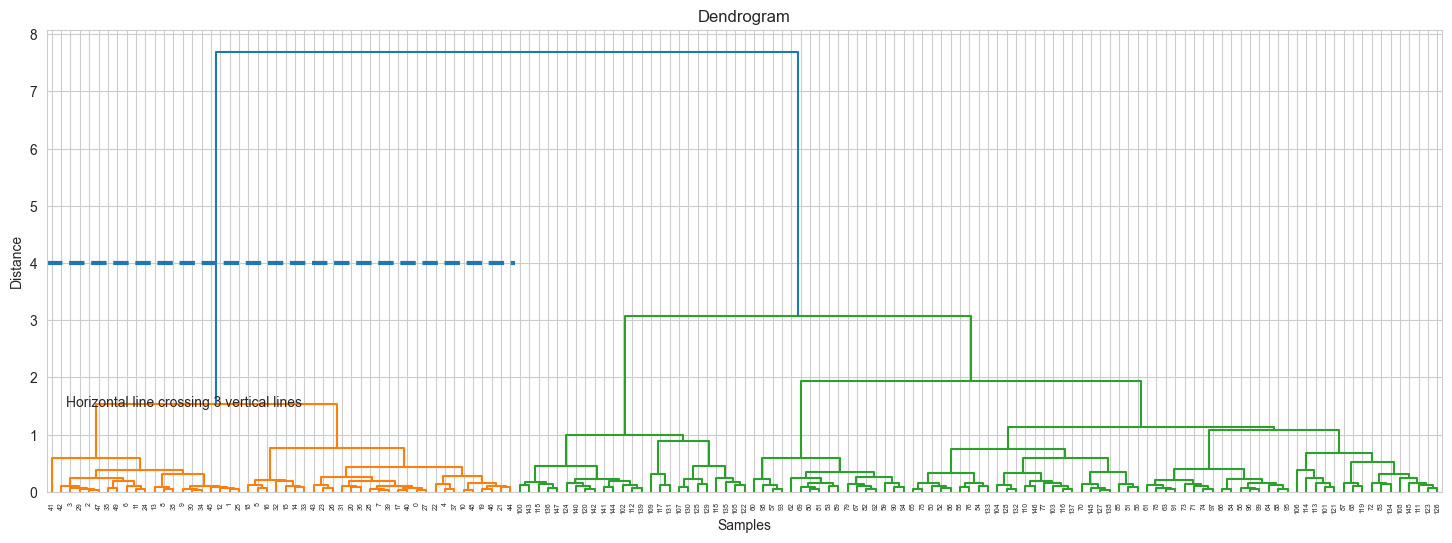

In [279]:
plt.figure(figsize=(18, 6))
dendro = shc.dendrogram(shc.linkage(x, method="ward"))
plt.hlines(y=4,xmin=0,xmax=500,lw=3,linestyles='--')
plt.text(x=20,y=1.5,s='Horizontal line crossing 3 vertical lines')
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Agglomerative Clustering

In [280]:
#build the model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, metric = 'euclidean', linkage = 'ward')
hc_pred = hc.fit_predict(x)
hc_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [281]:
final_df['cluster']=hc_pred
final_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,0.222222,0.725,0.067797,0.041667,1
1,0.166667,0.475,0.067797,0.041667,1
2,0.111111,0.575,0.050847,0.041667,1
3,0.083333,0.525,0.084746,0.041667,1
4,0.194444,0.775,0.067797,0.041667,1


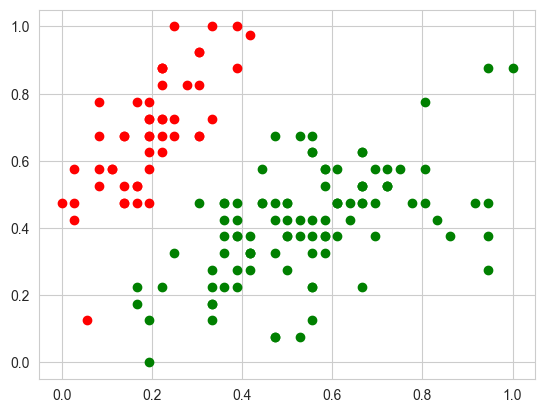

In [282]:
# Assuming 'cluster' is the column name containing cluster labels
df1 = final_df[final_df['cluster'] == 0]
df2 = final_df[final_df['cluster'] == 1]
df3 = final_df[final_df['cluster'] == 2]

plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='green', label='Cluster 0')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='red', label='Cluster 1')
plt.scatter(df3['sepal length (cm)'], df3['sepal width (cm)'], color='black', label='Cluster 2')

In [283]:
sa=[]
k_rng=range(2,11)

for k in k_rng:
    hc=AgglomerativeClustering(n_clusters=k)
    hc_pred=hc.fit_predict(x)
    sa.append(silhouette_score(x, hc_pred))
sa

[0.6206043243111915,
 0.48681003249318217,
 0.4159993855550138,
 0.338408519170629,
 0.280956589181842,
 0.29962490501677796,
 0.3034395967547441,
 0.32129922933330746,
 0.30269400553778836]

In [284]:
silhouette_score(x,hc_opt)

0.30269400553778836

#### Conslusion

- K Means Clustering:
Silhouette Score: 0.6206
K Means clustering achieved a relatively high silhouette score, indicating well-separated and compact clusters. This suggests that K Means clustering is effective in capturing the underlying structure of the Iris dataset.

- Hierarchical Clustering (Agglomerative):
Silhouette Score: 0.3027
Hierarchical clustering, specifically Agglomerative Clustering, produced a lower silhouette score compared to K Means. While the score is positive, indicating some level of separation and cohesion within clusters, it is notably lower than that of K Means.


#### In summary, based on the silhouette scores, K Means clustering outperforms hierarchical clustering (Agglomerative Clustering) on the Iris dataset. K Means achieved higher cluster quality in terms of separation and compactness.actness.ations.